# Costal Systems Notebook 3: Tidal Environments

In chapter 4 of the textbook, we looked into the global variation in the main processes that shape the coast: wind, waves, and tides. In this notebook, we will focus on the large-scale variation in tides. 
The two main variables on the basis of which tidal environments can be classified are:
- **Magnitude of the tide**, characterised by the tidal range;
- **Tidal character**, determined by the importance of diurnal vs. semi-diurnal components

In this notebook, we will explore both classifications using python code. Therefore, please import the libraries that we need for the analysis from the cell below.


In [1]:
# Run this to import modules

import pathlib
from pathlib import Path
import sys
from warnings import filterwarnings
import ipywidgets as widgets
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr
from datetime import datetime, timedelta
from IPython.display import display, Image
import math

cwd = pathlib.Path().resolve()
#proj_dir = cwd.parent  # this is the root of the CoastalCodeBook
DATA_DIR = '/Users/mpupicvurilj/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/Documents/TU Delft/Coastal Systems/Data/Tides'

<br><br>
## 1. Tidal Environments

The tidal wave is distorted by local differences in water depth and by the location and shape of land masses and large embayments. This results in a global variation in tidal range controlled by the large-scale coastal configuration. The tidal character expressed through mean spring tidal range:


|Category| Mean spring tidal range |
|----------------|:--:|
| Micro-tidal | < 2m | 
| Meso-tidal | 2m - 4m | 
| Macro-tidal | > 4m | 

<br>The tidal character, on the other hand, is defined by the form factor F: <center>*F = (K1 + O1)/(M2 + S2)*,</center>
where *K1*, *O1*, *M2*, and *S2* are the amplitudes of the corresponding tidal constituents. <br><br>

|Category| Value of F |
|----------------|:--:|
| Semidiurnal | 0 - 0.25 | 
| Mixed, mainly semidiurnal | 0.25 - 1.5 | 
| Mixed, mainly diurnal | 1.5 - 3 | 
| Diurnal | > 3 | 

<br> In the figure below, you can see the world distribution of mean spring tidal range (*left*) and tidal characters (*right*).
- Look into the semi-enclosed seas vs. open coasts; do you notice anything? Why?
- Compare the figure above with the figure below; what do you notice?



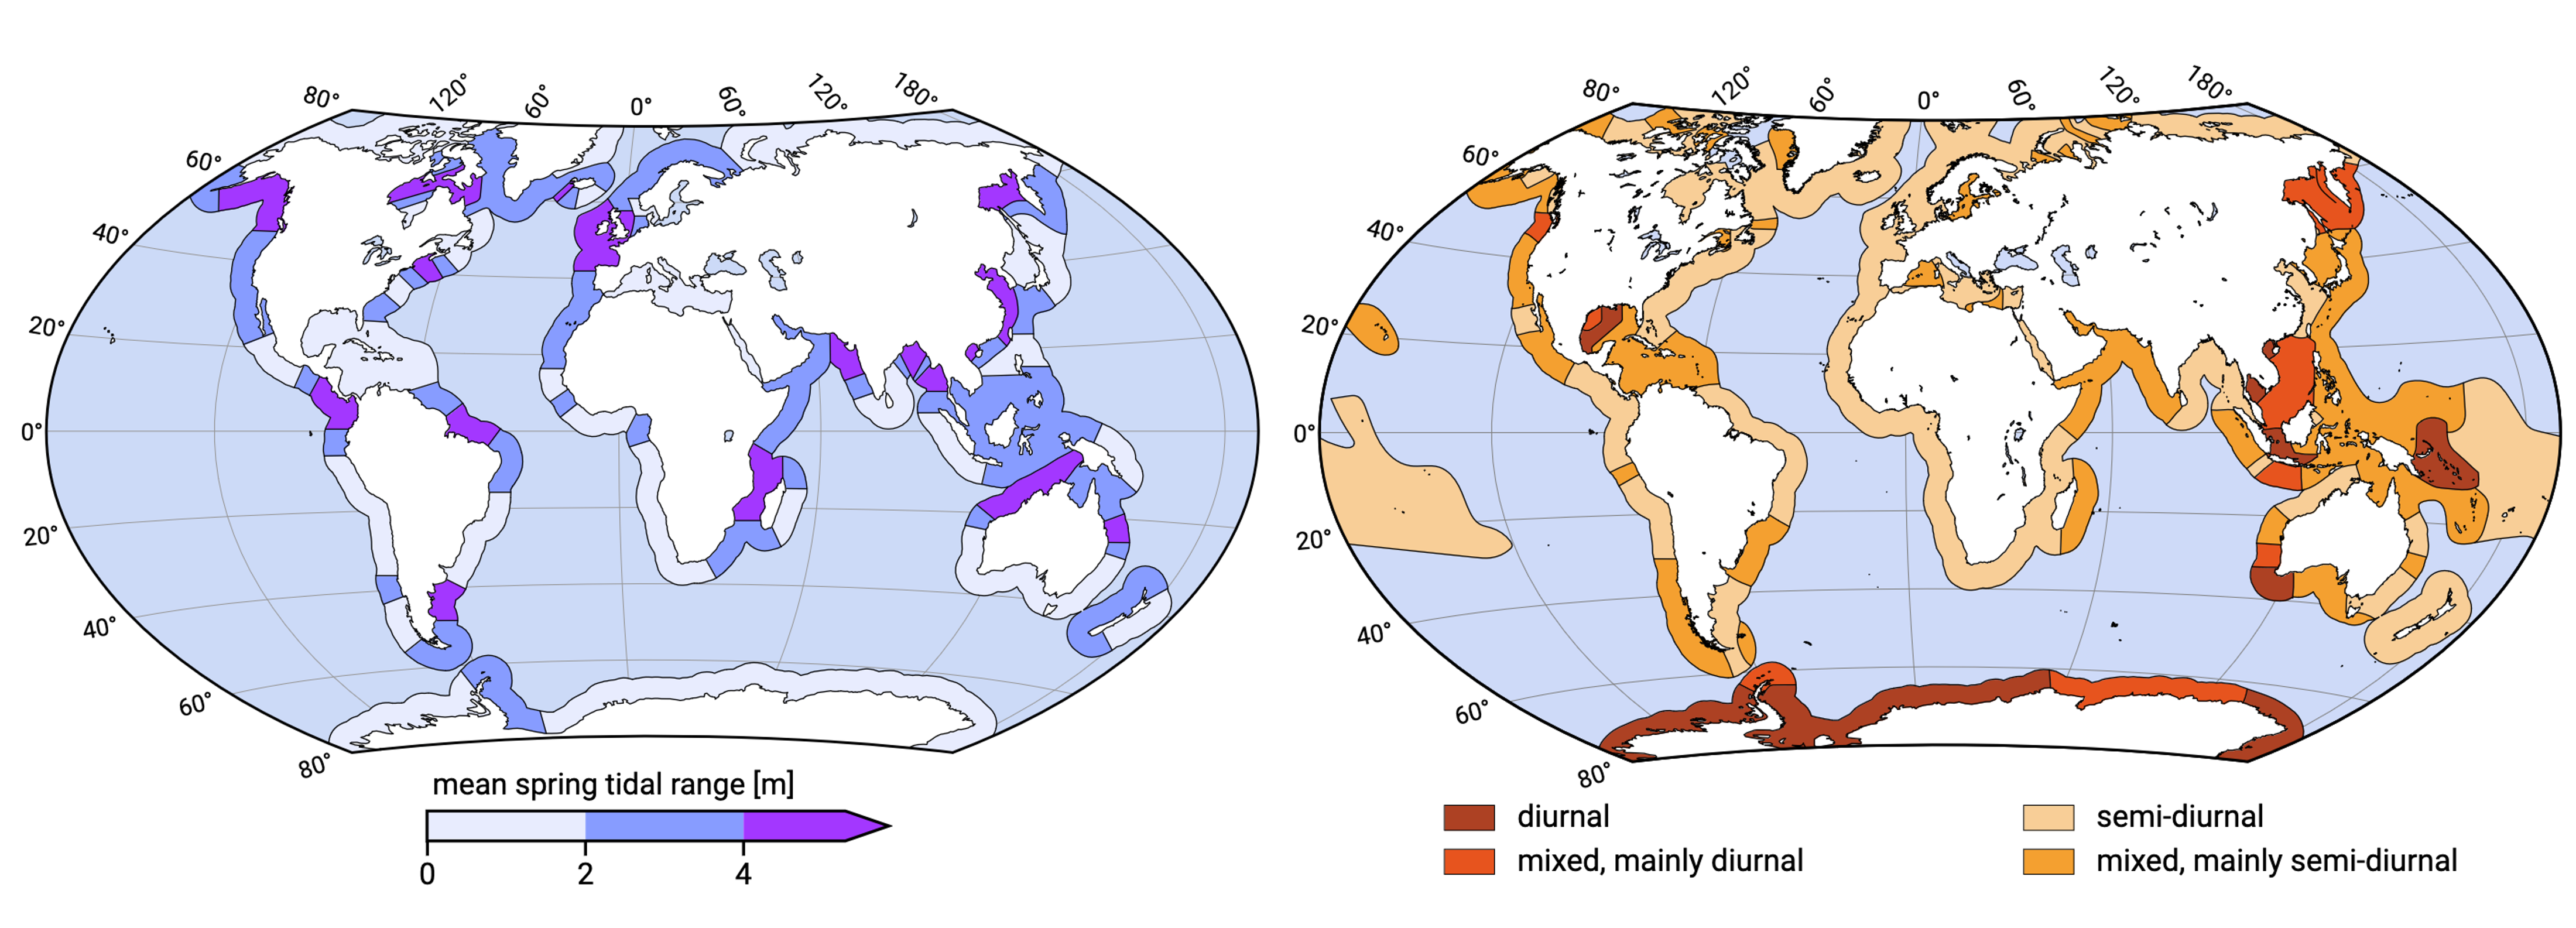

In [2]:
# Run this block to get the figure

image_path = "/Users/mpupicvurilj/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/Documents/TU Delft/Coastal Systems/tidal_env.png"
display(Image(filename=image_path))

<br><br><br>
## 2. Tidal Character at Specific Locations

Let's now categorize the tide at four specific locations. We will once again use the [FES2014 Global Tide data](https://www.aviso.altimetry.fr/en/data/products/auxiliary-products/global-tide-fes/description-fes2014.html), which provides amplitude and phase information for 34 tidal constituents, distributed on 1/16˚ grids.

The amplitudes of the constituents at each location are proved in the table below, so that we don't have to load the data again.

|Tidal amplitudes [cm]| M2 | S2 | K1 | O1 |
|----------------|:--:|:--:|:--:|----|
| Scheveningen   | 75.78 | 17.74 | 8.39  |  11.85 | 
| Galveston  | 13.08| 3.97  |  16.17 | 15.89 | 
| Rio de Janeiro | 29.92 | 16.90 | 6.01  |  10.32 | 
| Jakarta | 4.78 |  4.96 |  25.62 | 13.29 |

<br> In cell below, write your own code to calculate the form factor *F* at each location.

In [3]:
# Write your code here. HINT: Use lists and a for loop for code simplicity

M2 = ...
S2 = ...
K1 = ...
O1 = ...
...

print(F)


NameError: name 'F' is not defined

In [4]:
# Run to get questions

print("\n What is the category of:")
from category_initialize import init
init()

# keep the format of answers as in the tables above


 What is the category of:


<br><br>

Let's now plot the tidal characters across the globe obtained from the FES2014 dataset and mark the four locations from above. Do your answers match the locations on the map?

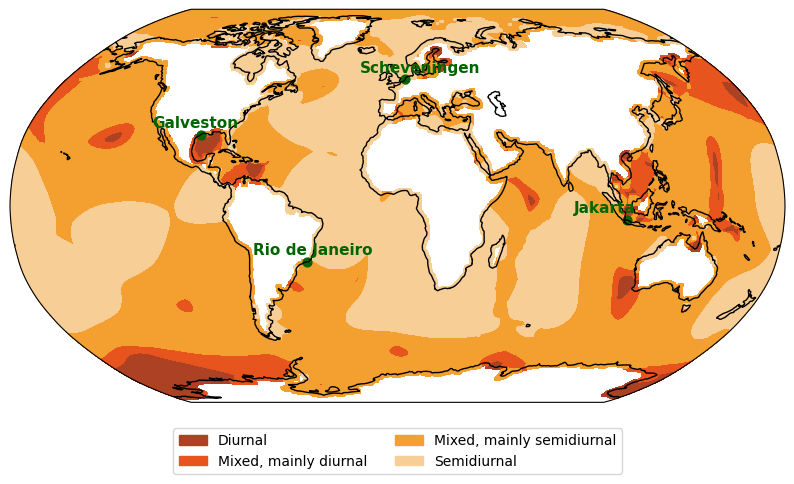

In [5]:
## FES2014 Tidal Characters
# the code is a bit slow!

fp = "/Users/mpupicvurilj/Library/CloudStorage/OneDrive-DelftUniversityofTechnology/Documents/TU Delft/Coastal Systems/Data/F_data.pkl"
F_data = pd.read_pickle(fp)

# Define the categories and corresponding colors
categories = {
    'Diurnal': {'min': 3, 'max': float('inf'), 'color': '#ad4123'},
    'Mixed, mainly diurnal': {'min': 1.5, 'max': 2.9, 'color': '#e7541e'},
    'Mixed, mainly semidiurnal': {'min': 0.25, 'max': 1.49, 'color': '#f4a030'},
    'Semidiurnal': {'min': 0, 'max': 0.249, 'color': '#f8ce97'}
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 11), subplot_kw={'projection': ccrs.Robinson(central_longitude=0.0)})
ax.set_global()

# Plot the scatter points with specific colors for each category
legend_patches = []
for category, values in categories.items():
    subset_data = F_data[(F_data['F'] >= values['min']) & (F_data['F'] <= values['max'])]
    if not subset_data.empty:
        scatter = ax.scatter(subset_data.index.get_level_values('lon').values, 
                             subset_data.index.get_level_values('lat').values, s=1, color=values['color'], 
                             label=category, transform=ccrs.PlateCarree())
        legend_patches.append(Patch(color=scatter.get_facecolor()[0], label=category))

# Add markers for specific locations - here you can edit the code if you are wondering for a specific location
locs = {
    'Scheveningen': [4.25, 52.125],  # lon, lat
    'Galveston': [-94.6875, 29.25],
    'Rio de Janeiro': [-43.125, -23],
    'Jakarta': [106.8125, -5.8125],
}

for loc, coordinates in locs.items():
    lon, lat = coordinates
    ax.scatter(lon, lat, color='darkgreen', s=40, transform=ccrs.PlateCarree())
    ax.text(lon - 25, lat+3, loc, color='darkgreen', fontsize=11, fontweight='bold', transform=ccrs.PlateCarree())

ax.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax.coastlines(resolution='110m', color='black')
plt.show()
